<a href="https://colab.research.google.com/github/shresth97/ML_repo/blob/main/GRIP_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**The Spark Foundation Internship**

### **Name : Shresth Mittal**

###**TASK-1 : Prediction Using Supervised Machine Learning Technique**

Importing all the required Modules and Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

##Importing the Dataset

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
dataset.shape

(25, 2)

In [6]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
dataset.isna().apply(pd.value_counts) #Checking for null values

,Hours,Scores
False,25,25


##Plotting the data on a graph for better visualisation

<Figure size 1440x1080 with 0 Axes>

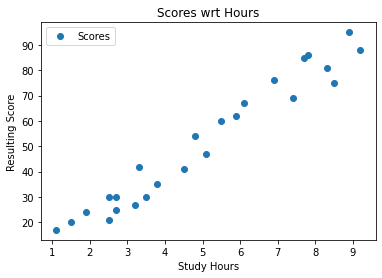

In [9]:
plt.figure(figsize = (20,15))
dataset.plot(x='Hours',y='Scores', style= 'o')
plt.title("Scores wrt Hours")
plt.xlabel("Study Hours")
plt.ylabel("Resulting Score")
plt.show()

##Preparing the Data 

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

##Splitting Our dataset into Training Set and Test Set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


##Training our Results using LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("*********Training Completed***********")

*********Training Completed***********


In [27]:
print(X_test)
y_pred = regressor.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

##Plotting our results after Training

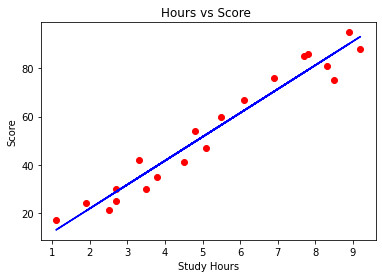

In [18]:
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')
plt.title('Hours vs Score ')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

##Visualizing our Test Results

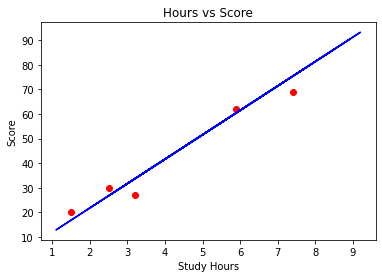

In [19]:
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')
plt.title('Hours vs Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

##Creating a DataFrame to check Actual vs Predicted values

In [22]:
Actual_vs_Predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
Actual_vs_Predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##Now Finally Predicting our Score after studying for 9.5 Hours

In [33]:
hour_studied = [[9.25]]
pred = regressor.predict(hour_studied)
print(" No. of hours studied: {}".format(hour_studied))
print("Score wrt hours studied: {}".format(pred))

 No. of hours studied: [[9.25]]
Score wrt hours studied: [93.69173249]


#Performing mertics on our data

In [34]:
from sklearn import metrics

In [35]:
print('Mean Absoulte Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absoulte Error 4.183859899002982
Mean Squared Error 21.598769307217456
Root Mean Squared Error 4.647447612100373
R2: 0.9454906892105354
